1.0
Predictated color of Point:  Green


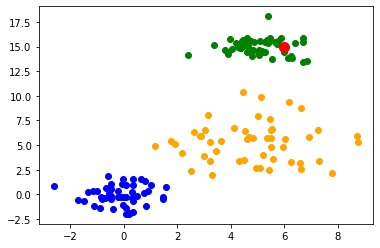

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

# main knn part

def euclidian_metric(a, b):
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

def find_neighbours(k, y, distances):
    sort_distances = np.argsort(distances)
    neighbours_distances = distances[sort_distances[:k]]
    neighbours = y[sort_distances[:k]]
    return neighbours, neighbours_distances

def get_closest_classes(neighbours):
    counted_neighbours = np.unique(neighbours, return_counts=True)
    indexes = np.where(counted_neighbours[1] == np.amax(counted_neighbours[1]))
    best_classes = neighbours[indexes] 
    return best_classes

def choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = None
    for i in best_classes:
        indexes = np.where(neighbours == i)
        cur_dist = np.sum(neighbouring_distances[indexes]) / len(indexes)
        if (min_mean_dist > cur_dist):
            min_mean_dist = cur_dist
            best_class = i
    return best_class

def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)
    for i in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов
        neighbours, neighbouring_distances = find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
        best_classes = get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей
        res[i] = choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей
    return res

np.random.seed(seed=42)

p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])
classes = {1: "Blue", 2: "Orange", 3: "Green"}


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

point = [6, 15]

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s = 100, color='red')
#plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)
print(accuracy_score(y_test, y_pred))

point = np.array([point]) # изначально точка добавлялась на график как список, но мы работает с numpy массивами
print("Predictated color of Point: ", classes[nearest_neighbours_classify(X_train, y_train, 5, point)[0]])


In [14]:
# MNIST part
X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [9]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [17]:
draw(w=16, h=16, line_width=1)

168

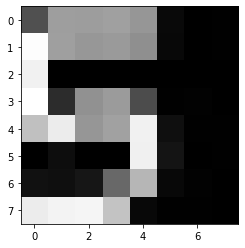

In [18]:
from PIL import Image

img = Image.open('drawing.png')

r = img.resize((8,8), Image.ANTIALIAS)
red, green, blue, alpha = r.split()

image_array = np.array(alpha).reshape((1, 64))
plt.imshow(image_array.reshape([8,8]), cmap='gray')

In [19]:
y_pred = nearest_neighbours_classify(X_train, y_train, 5, image_array)
print('This is number ', y_pred[0])

This is number  5
